In [6]:
import numpy as np
import pandas as pd
import time
import parallel_test4 as test_3
import plotMagneticField as hplot
import matplotlib.pyplot as plt

In [2]:
# Initialize coil parameters
X_coil = test_3.CoilParameters(1, 1, 36)
# Current coil simulation
I = np.array([1,2,3])
Ax = np.eye(3)

# X coil simulation
grid_length_size = 0.1
num_seg = 100

In [3]:
##Generar espiras
spire1_s, spire2_s = test_3.square_spires(Ax, X_coil.h, X_coil.a, num_seg)
f = hplot.plot_spires(spire1_s, spire2_s, color='black')

In [4]:
# Generar grid
X, Y = test_3.generate_range(X_coil.a*3/4, grid_length_size)
hplot.plot_grid(X, Y, f)

In [8]:
# Initialize a list to store the execution times for different n_spires and points
execution_times = []

# Iniciar simulación
for n_spires in range(1, 5):
    for points in range(1, 100):
        start_time = time.time()
        # Run the simulation
        x_coil_results_s = test_3.coil_simulation_1d_sequential(grid_length_size, X_coil, I[0], spire1_s, spire2_s, n_spires, points)
        # Mark the end time
        end_time = time.time()
        # Calculate execution time
        execution_time = end_time - start_time
        # Store the results in the list
        execution_times.append([n_spires, points, execution_time])

# Create a pandas DataFrame
df = pd.DataFrame(execution_times, columns=['n_spires', 'points', 'execution_time'])

# Save the DataFrame to a CSV file
df.to_csv('execution_times_1.csv', index=False)

print("Execution times have been saved to 'execution_times.csv'.")
    

Simulation Progress: 100%|██████████| 484/484 [01:23<00:00,  5.82it/s]
Simulation Progress: 486it [01:05,  7.40it/s]                         
Simulation Progress: 100%|██████████| 484/484 [00:56<00:00,  8.53it/s]
Simulation Progress: 485it [00:51,  9.49it/s]                         
Simulation Progress: 486it [00:46, 10.42it/s]                         
Simulation Progress: 490it [00:44, 11.09it/s]                         
Simulation Progress: 488it [00:42, 11.38it/s]                         
Simulation Progress: 486it [00:41, 11.76it/s]                         
Simulation Progress: 490it [00:38, 12.63it/s]                         
Simulation Progress: 100%|██████████| 484/484 [00:38<00:00, 12.54it/s]
Simulation Progress: 492it [00:37, 13.12it/s]                         
Simulation Progress: 494it [00:34, 14.36it/s]                         
Simulation Progress: 490it [00:35, 13.83it/s]                         
Simulation Progress: 495it [00:35, 14.13it/s]                         
Simula

Execution times have been saved to 'execution_times.csv'.


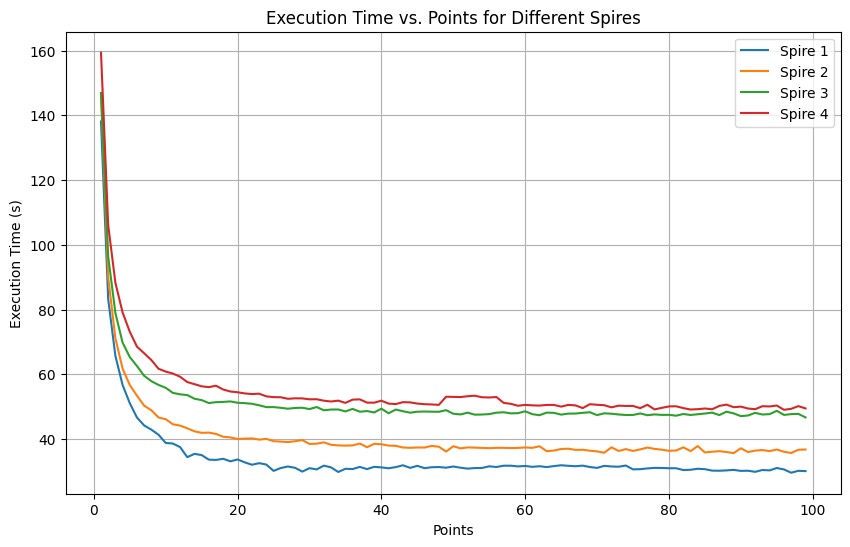

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
for n in df['n_spires'].unique():
    subset = df[df['n_spires'] == n]
    plt.plot(subset['points'], subset['execution_time'], label=f"Spire {n}")

plt.title("Execution Time vs. Points for Different Spires")
plt.xlabel("Points")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.show()